In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = None
from sklearn.preprocessing import StandardScaler # zscore
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from scipy import stats

In [2]:
df = pd.read_csv('water_potability.csv')

In [7]:
df.head(5)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [8]:
df.Potability.value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [9]:
# Verificar valores null
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [5]:
# Verificar valores null
df.isnull().values.any()

True

In [6]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [14]:
# test de normalidad
cols = df.select_dtypes(exclude=['datetime64[ns]'])
print('selo se muestran las variables de comportamiento normal')
for var in cols:
    stat, p = stats.normaltest(df[var])
    # interpretacion
    alpha = 1e-3
    if p > alpha:
        print('var=', var)
        print('Statistics = %.3f, p = %g,  looks like a normal distribution, H0 cannot be rejected' % (stat, p))

selo se muestran las variables de comportamiento normal


- Ninguna variable pasó el test de normalidad

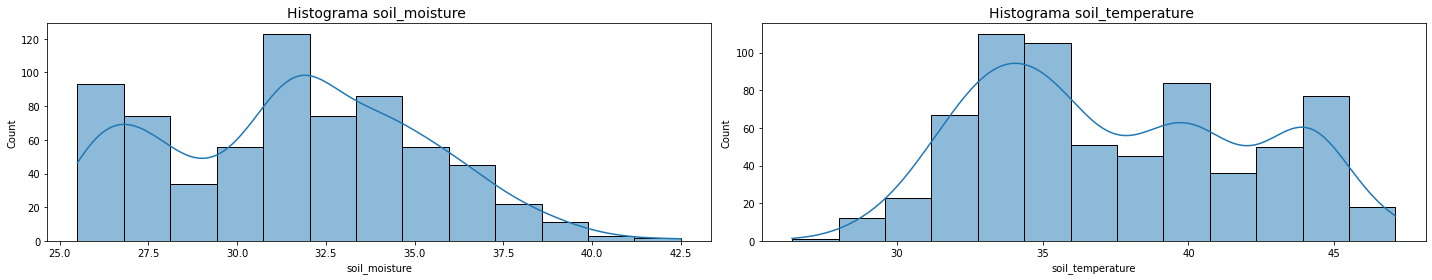

In [15]:
# Histograma
plt.figure(figsize=(20, 4))
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='soil_moisture', legend=True, kde=True);
plt.title('Histograma soil_moisture ', size=14);
plt.subplot(1, 2, 2)
sns.histplot(data=df, x='soil_temperature', legend=True, kde=True);
plt.title('Histograma soil_temperature ', size=14);
#plt.legend()
plt.tight_layout()

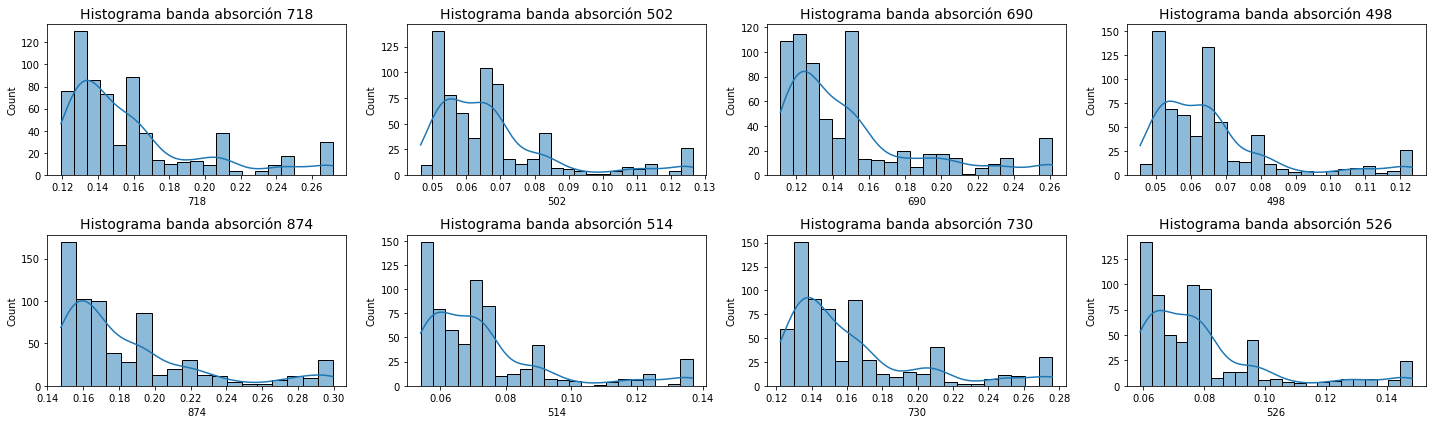

In [16]:
# Histograma
plt.figure(figsize=(20, 6))
ran1=[]
for i in range (1,9):
    ran=np.random.choice(df.columns[3:].to_list())
    ran1.append(ran)
    plt.subplot(2, 4, i)
    sns.histplot(data=df, x=ran, legend=True, kde=True)
    plt.title('Histograma banda absorción {}'.format(ran), size=14)
    plt.tight_layout();
ran1=ran1[::-1]

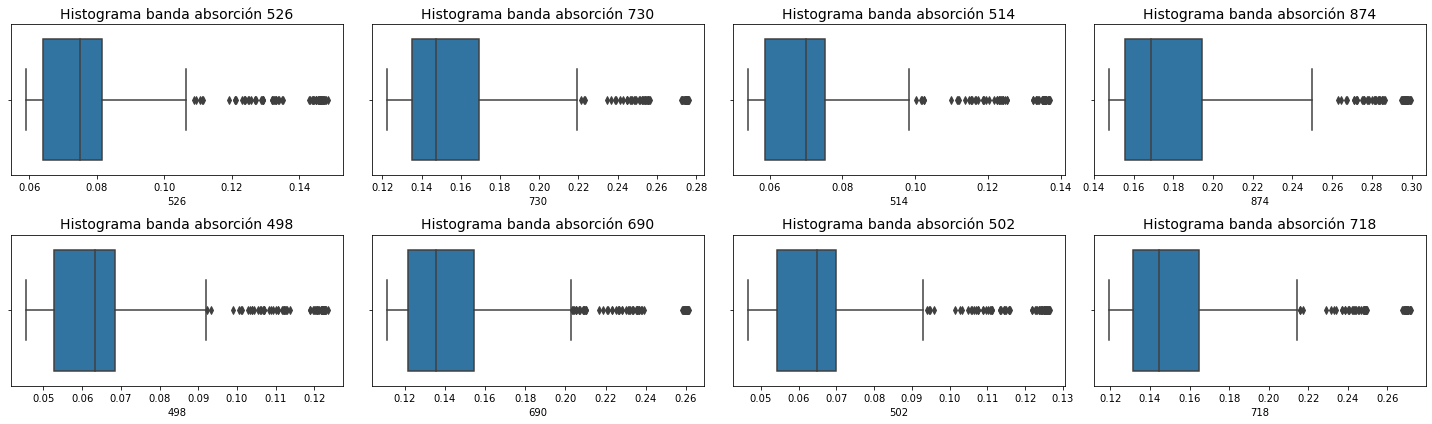

In [17]:
# boxplot
plt.figure(figsize=(20, 6))
i=1
for r in ran1:
    plt.subplot(2, 4, i)
    sns.boxplot(data=df, x=r)
    plt.title('Histograma banda absorción {}'.format(r), size=14)
    plt.tight_layout();
    i+=1

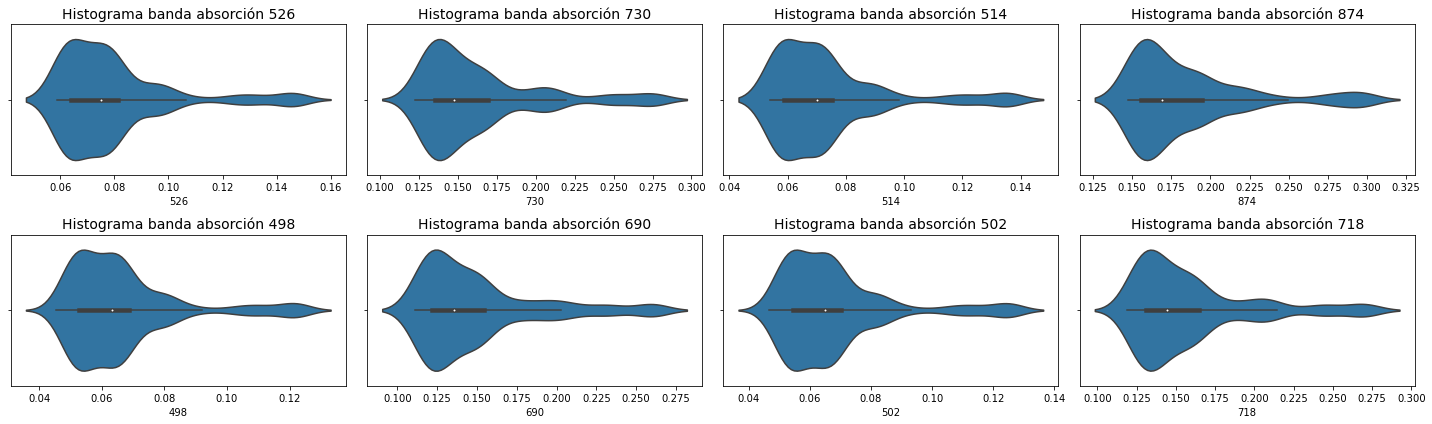

In [24]:
# violinplot
plt.figure(figsize=(20, 6))
i=1
for r in ran1:
    plt.subplot(2, 4, i)
    sns.violinplot(data=df, x=r)
    plt.title('Histograma banda absorción {}'.format(r), size=14)
    plt.tight_layout();
    i+=1

- las distribuciones de las variables como lo hemos visto en analisis de normalidad, histogramas, boxplot y violinplot, no se comportan de forma gaussiana, por lo que se utilizaran metodos de normalizacion.

## Normalizacion

Cuando se habla de normalizar, lo que se desea es escalar todos los valores entre 0 y 1. Y lo que se necesita es establecer cuales son los valores minimo y maximo. En este caso se usara el objeto MinMaxScaler disponible sklearn

In [25]:
# Conversion de los datos a numpy array
df2=df[df.columns[3:]]
valores = df2.values

# Construcion de escalador
scaler = MinMaxScaler()
scaler = scaler.fit(valores)

# Escalamiento de los valores
normalizados = scaler.transform(valores)
df_normal = pd.DataFrame(normalizados,
                              index=df2.index,
                              columns=df2.columns)

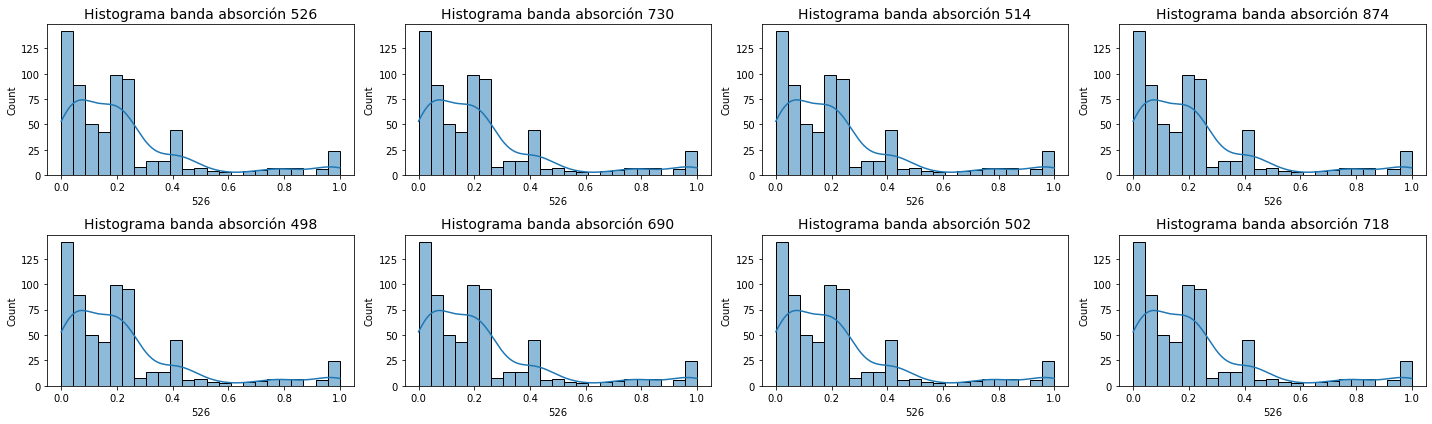

In [26]:
# Histograma normalizado
plt.figure(figsize=(20, 6))
i=1
for r in ran1:
    plt.subplot(2, 4, i)
    sns.histplot(data=df_normal, x=ran, legend=True, kde=True)
    plt.title('Histograma banda absorción {}'.format(r), size=14)
    plt.tight_layout();
    i+=1

## Estandarizacion

En este proceso se escalan los valores de forma tal que la media sea igual a cero y la desviacion estandar igual a 1. A diferencia que la normalizacion, ésta supone que las observaciones siguen una distribución Gaussiana.

In [27]:
# Conversion de los datos a numpy array
df2=df[df.columns[3:]]
valores = df2.values

# Construcion de escalador
scaler = StandardScaler()
scaler = scaler.fit(valores)

# Escalamiento de los valores
estandarizados = scaler.transform(valores)
df_standard = pd.DataFrame(estandarizados,
                              index=df2.index,
                              columns=df2.columns)

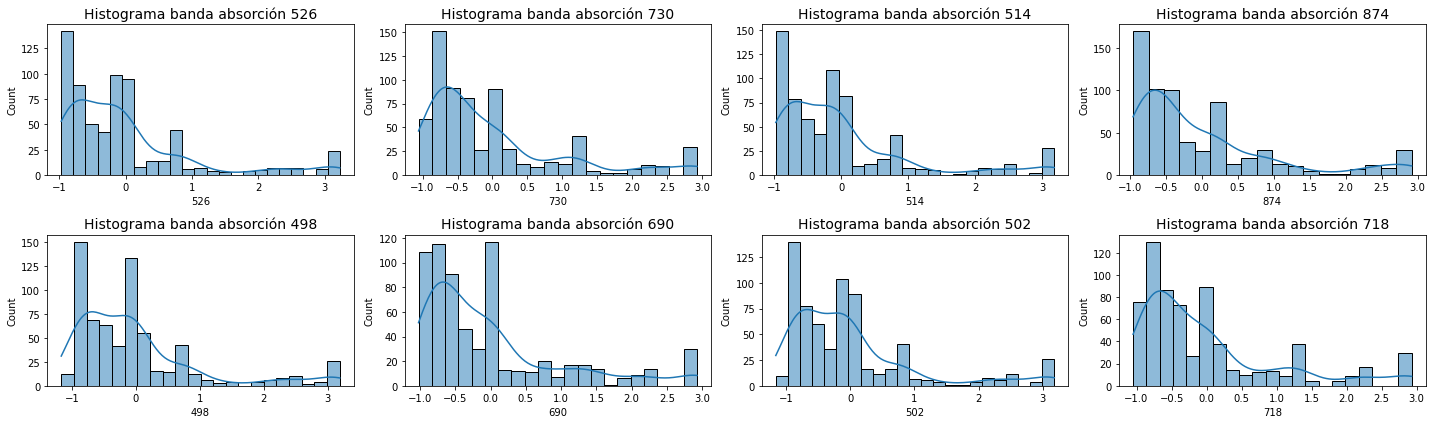

In [28]:
# Histograma estandarizados
plt.figure(figsize=(20, 6))
i=1
for r in ran1:
    plt.subplot(2, 4, i)
    sns.histplot(data=df_standard, x=r, legend=True, kde=True)
    plt.title('Histograma banda absorción {}'.format(r), size=14)
    plt.tight_layout();
    i+=1

- El objetivo de estandarizacion no se cumple debido a que las distribuciones no son normales

- Dada la naturaleza de los datos (bandas de absorcion espectrales) y su distribucion, no se realizaran proceso de normalizacion o estandarizacion

- Quizas minMaxScaler ?????

# Correlacion

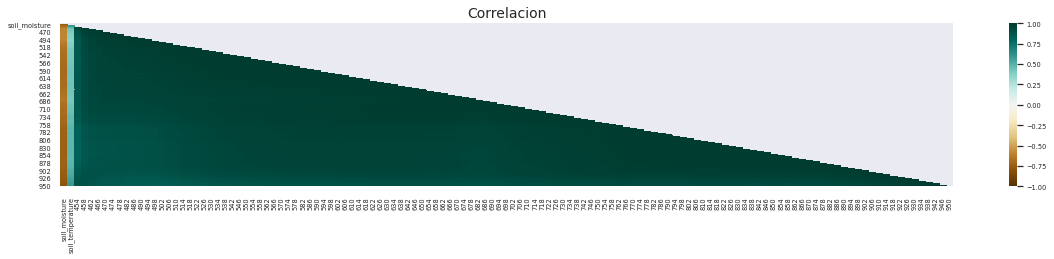

In [32]:
# correlacion
plt.figure(figsize=(20,3))
sns.set(font_scale=0.6)
corr = df.drop(['datetime'], axis=1).corr(method='spearman')
plt.title('Correlacion', size=14);
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.heatmap(corr, annot=False, cmap='BrBG', vmin=-1, vmax=1, mask=mask);

In [97]:
corr.head(3)

,soil_moisture,soil_temperature,454,458,462,466,470,474,478,482,486,490,494,498,502,506,510,514,518,522,526,530,534,538,542,546,550,554,558,562,566,570,574,578,582,586,590,594,598,602,606,610,614,618,622,626,630,634,638,642,646,650,654,658,662,666,670,674,678,682,686,690,694,698,702,706,710,714,718,722,726,730,734,738,742,746,750,754,758,762,766,770,774,778,782,786,790,794,798,802,806,810,814,818,822,826,830,834,838,842,846,850,854,858,862,866,870,874,878,882,886,890,894,898,902,906,910,914,918,922,926,930,934,938,942,946,950
soil_moisture,1.000000,-0.756959,-0.680787,-0.633346,-0.602779,-0.593096,-0.588724,-0.587705,-0.591934,-0.586407,-0.587792,-0.592496,-0.586826,-0.593558,-0.605345,-0.617548,-0.628418,-0.643588,-0.650148,-0.654886,-0.658895,-0.664938,-0.669636,-0.670307,-0.670387,-0.672192,-0.672494,-0.675816,-0.677693,-0.679694,-0.683267,-0.683640,-0.684571,-0.686618,-0.688307,-0.687700,-0.688149,-0.688735,-0.690478,-0.691260,-0.688473,-0.686035,-0.684957,-0.683908,-0.683719,-0.683933,-0.683807,-0.682587,-0.682007,-0.680364,-0.677486,-0.673588,-0.670191,-0.669079,-0.667632,-0.663106,-0.656802,-0.649314,-0.643365,-0.642565,-0.644417,-0.650907,-0.657561,-0.665462,-0.672204,-0.676888,-0.678859,-0.679728,-0.681704,-0.683211,-0.687078,-0.691961,-0.695066,-0.697365,-0.699457,-0.700102,-0.700748,-0.703479,-0.708976,-0.715914,-0.723109,-0.726290,-0.728258,-0.729501,-0.730872,-0.731008,-0.730898,-0.729324,-0.727986,-0.725879,-0.726823,-0.728656,-0.729742,-0.730901,-0.731553,-0.732760,-0.733020,-0.733982,-0.734953,-0.734288,-0.733737,-0.733311,-0.732297,-0.730676,-0.729412,-0.728725,-0.728285,-0.728396,-0.729450,-0.729807,-0.731833,-0.733513,-0.735762,-0.737145,-0.739824,-0.741399,-0.743665,-0.747500,-0.750814,-0.753842,-0.757570,-0.761924,-0.767019,-0.772077,-0.778061,-0.782378,-0.784708
soil_temperature,-0.756959,1.000000,0.582009,0.490189,0.450661,0.427898,0.410523,0.400364,0.397072,0.382711,0.378901,0.375607,0.364267,0.363310,0.370765,0.379069,0.387419,0.397367,0.401141,0.405842,0.407150,0.410075,0.414146,0.416703,0.418281,0.416327,0.412602,0.418454,0.422021,0.420751,0.425004,0.425904,0.428288,0.432093,0.431198,0.432941,0.435173,0.436861,0.438497,0.438146,0.437137,0.436314,0.435213,0.435487,0.435595,0.435020,0.437429,0.437784,0.437673,0.436385,0.434477,0.432471,0.431295,0.432267,0.431973,0.428054,0.423242,0.416258,0.413662,0.415106,0.417452,0.421414,0.428333,0.433884,0.439287,0.441758,0.444178,0.445090,0.448697,0.452480,0.456486,0.461575,0.466840,0.470024,0.469536,0.468724,0.466707,0.468092,0.473751,0.480301,0.485807,0.488298,0.489165,0.489900,0.491717,0.492527,0.492976,0.490760,0.489410,0.488453,0.489909,0.491092,0.490070,0.490346,0.491256,0.492044,0.490593,0.489059,0.488712,0.488086,0.487696,0.486596,0.485080,0.483598,0.481470,0.481506,0.483405,0.484668,0.486039,0.487526,0.492626,0.495843,0.499888,0.505416,0.512397,0.517708,0.521512,0.527491,0.534159,0.543292,0.550667,0.559641,0.568264,0.573630,0.581259,0.586508,0.591789
454,-0.680787,0.582009,1.000000,0.964574,0.941990,0.925391,0.910136,0.899461,0.894586,0.884492,0.879981,0.875152,0.865727,0.860634,0.861513,0.861412,0.862541,0.862766,0.860201,0.862341,0.861263,0.859071,0.860993,0.861403,0.861896,0.857064,0.853454,0.857935,0.857954,0.858318,0.858053,0.859258,0.861841,0.862459,0.861835,0.864303,0.863605,0.864351,0.864773,0.864318,0.867173,0.870058,0.869355,0.869559,0.870808,0.871211,0.872796,0.872922,0.872562,0.871542,0.872747,0.874083,0.874016,0.873968,0.873640,0.872951,0.873977,0.872778,0.872288,0.874160,0.874672,0.872118,0.870372,0.869390,0.868801,0.867685,0.867002,0.866651,0.866107,0.864442,0.863437,0.863173,0.862559,0.859557,0.857290,0.857327,0.857167,0.856158,0.851050,0.841893,0.834014,0.828641,0.826498,0.825910,0.825124,0.824083,0.823607,0.822753,0.826321,0.829334,0.827505,0.824569,0.822044,0.820158,0.819060,0.817641,0.816965,0.816395,0.815222,0.815259,0.815025,0.814017,0.815771,0.817011,0.816974,0.819476,0.823543,0.826406,0.827870,0.829993,0.832871,0.835255,0.840009,0.

- Las variables espectrales se encuentran fuertemente correlacionados entre ellas, lo que es de esperar

In [96]:
pd.DataFrame(corr.stack().reset_index()).head(3)

,level_0,level_1,0
0,soil_moisture,soil_moisture,1.000000
1,soil_moisture,soil_temperature,-0.756959
2,soil_moisture,454,-0.680787


In [65]:
def tabla_corr(corr_data):
    corr_data = corr_data.stack().reset_index()
    corr_data.columns = ['var1','var2','r']
    corr_data = corr_data.loc[corr_data['var1'] != corr_data['var2'], :]
    corr_data['r_abs'] = np.abs(corr_data['r'])
    corr_data = corr_data.sort_values('r_abs', ascending=False)  
    return(corr_data)

In [89]:
tablaCorr=tabla_corr(corr)
corrVal=tablaCorr[(tablaCorr['r_abs']>0.7) & (tablaCorr['var1']=='soil_moisture')].sort_values('r_abs', ascending=False)
corrVal.head(3)

,var1,var2,r,r_abs
126,soil_moisture,950,-0.784708,0.784708
125,soil_moisture,946,-0.782378,0.782378
124,soil_moisture,942,-0.778061,0.778061


In [90]:
df_filterCorr=df[corrVal.var2.values]
df_filterCorr.head(3)

,950,946,942,938,934,930,926,soil_temperature,922,918,914,910,906,902,898,894,838,842,834,846,890,850,830,826,854,886,822,786,818,790,782,858,882,814,778,878,862,794,866,810,874,870,774,798,806,770,802,766,762,758,754,750,746
0,0.153929,0.153477,0.154275,0.154682,0.154725,0.155018,0.154240,34.8,0.152927,0.152615,0.152845,0.152900,0.153032,0.152719,0.152416,0.151944,0.148306,0.148695,0.148168,0.149169,0.151157,0.149621,0.148273,0.148043,0.149989,0.151156,0.147860,0.144417,0.147590,0.145237,0.143240,0.150042,0.150922,0.147211,0.142165,0.150901,0.150073,0.145595,0.150504,0.146754,0.150936,0.150803,0.141718,0.145843,0.146550,0.140961,0.146072,0.140110,0.139682,0.138825,0.137879,0.136705,0.135413
1,0.156727,0.156220,0.155543,0.154021,0.153370,0.153688,0.153590,35.2,0.153551,0.153102,0.152715,0.152848,0.152629,0.152391,0.151720,0.151034,0.147750,0.147913,0.147310,0.147479,0.150538,0.147233,0.146817,0.146502,0.147689,0.150217,0.146592,0.142277,0.146341,0.143425,0.141932,0.148296,0.149966,0.146163,0.141593,0.149916,0.149031,0.144398,0.149187,0.145616,0.149423,0.149416,0.140868,0.144630,0.145314,0.140073,0.145129,0.139124,0.138213,0.137322,0.136682,0.135896,0.134591
2,0.154485,0.154884,0.155545,0.155609,0.154629,0.154610,0.153942,35.4,0.153204,0.152158,0.152362,0.152802,0.152294,0.151932,0.151122,0.150394,0.147014,0.147254,0.146826,0.147352,0.149895,0.147695,0.146690,0.146411,0.148217,0.149699,0.146188,0.142576,0.146241,0.143226,0.141589,0.148582,0.149838,0.146272,0.141033,0.149884,0.148506,0.144020,0.148827,0.146030,0.149506,0.149458,0.140091,0.144574,0.145732,0.139638,0.145234,0.139275,0.138427,0.137510,0.136548,0.135737,0.134636


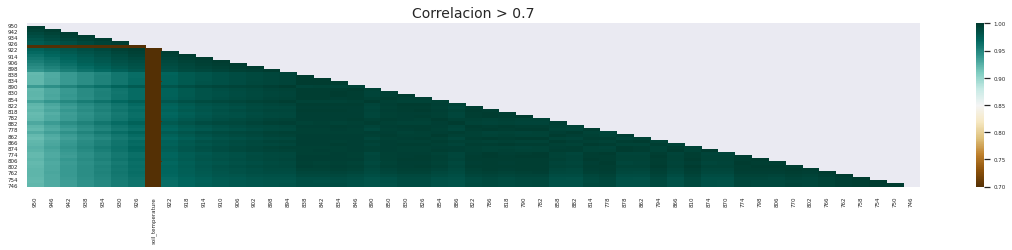

In [98]:
# correlacion
plt.figure(figsize=(20,3))
sns.set(font_scale=0.5)
corr2 = df_filterCorr.corr(method='spearman')
plt.title('Correlacion > 0.7', size=14);
mask = np.triu(np.ones_like(corr2, dtype=np.bool))
sns.heatmap(corr2, annot=False, cmap='BrBG', vmin=0.7, vmax=1, mask=mask);

# ML Aprendizaje Supervisado

In [ ]:
# train and test
def 